## __PROYECTO REGRESION LOGISTICA PARA CLASIFICACION__ <br>
*INTENSIDAD DE TERREMOTOS*<br>
BOOTCAMP INTELIGENCIA ARTIFICIAL <br>
NIVEL INTEGRADOR<br>
__AUTOR CRISTIAN ANDRES LLANTEN DULCE__<br>
__PRESENTADO A ING ANDRÉS FELIPE ESCALLON PORTILLA__

### __<center>Alerta Temprana de Intensidad Sísmica</center>__

#### __Introducción__
Los terremotos son fenómenos naturales impredecibles que pueden causar daños significativos a infraestructuras y pérdidas humanas. Este proyecto busca desarrollar un sistema de alerta temprana capaz de determinar la intensidad de un terremoto en tiempo real, utilizando datos sismológicos y tecnologías de vanguardia.


##### __Importamos Librerias__ <br>
*Realizamos la importacion de las librerias necesarias*<br>


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import roc_curve, roc_auc_score
import joblib

## <CENTER>Etiquetas de columnas</CENTER>

-__title:__ título nombre dado al terremoto<br>
-__magnitude:__ La magnitud del terremoto<br>
-__date_time:__ fecha y hora<br>
-__cdi:__ la intensidad máxima reportada para el rango del evento<br>
-__mmi:__ La intensidad instrumental máxima estimada para el evento.<br>
-__alert:__ el nivel de alerta: “verde”, “amarillo”, “naranja” y “rojo”<br>
-__tsunami:__ "1" para eventos en regiones oceánicas y "0" en caso contrario<br>
-__sig:__ un número que describe la importancia del evento. Los números <br>más grandes indican un evento más significativo. Este valor se determina en función <br>de una serie de factores, que incluyen: magnitud, MMI máximo, informes sentidos e impacto estimado.<br>
-__net:__ el ID de un contribuyente de datos. Identifica la red considerada <br>como la fuente de información preferida para este evento.<br>
-__nst:__ El número total de estaciones sismológicas utilizadas para determinar la ubicación del terremoto.<br>
-__dmin:__ Distancia horizontal desde el epicentro hasta la estación más cercana<br>
-__gap:__ la brecha azimutal más grande entre estaciones azimutalmente adyacentes (en grados).<br> En general, cuanto menor sea este número, 
más fiable será la posición horizontal calculada del terremoto.<br> Los lugares donde se producen terremotos en los que la brecha azimutal 
supera los 180 grados suelen <br>tener grandes incertidumbres de ubicación y profundidad.<br>
-__magType:__ el método o algoritmo utilizado para calcular la magnitud preferida para el evento<br>
-__depth:__ La profundidad donde el terremoto comienza a romperse<br>
-__latitude/longitude:__ sistema de coordenadas mediante el cual se puede determinar y describir <br>la posición o ubicación de cualquier lugar de 
la superficie terrestre<br>
-__location:__ ubicación dentro del país<br>
-__continent:__ continente del país afectado por el terremoto<br>
-__country:__ país afectado<br>
-__terremoto:__ indica 1 si es terremoto y 0 si no lo es segun la escala de richter<br>
-__intensidad:__ se determina 3 tipos de intensidad leve moderada y fuerte<br>

*Cargamos el data set a trabajar  earthquake_1995-2023.csv y realizamos el proceso de redondeo a 1 decimal*

In [2]:
df_sredondeo =pd.read_csv("earthquake_1995-2023.csv")
df = df_sredondeo.round(1)


*Agregamos la columna terremoto e intensidad a nuestro dataset con valores categoricos <br>respecto a la magnitud de nuestro dataset*

In [3]:
#en la escala de Richter, un terremoto se considera significativo a partir de una magnitud de 3.5.
df['terremoto'] = np.where(df['magnitude'] >= 3.5, 1, 0)
# Crear la columna 'intensidad' con las categorías especificadas
df['intensidad'] = np.where(df['magnitude'] <= 3.5, 'leve',
                           np.where(df['magnitude'] <= 6.5, 'moderado', 'fuerte'))

## <CENTER>ANÁLISIS EXPLORATORIO DE DATOS</CENTER>
*Visualizacion de todas las columnas y todas las filas del data set en el dataframe*<br>
Data set de 1000 registros

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head(2000)

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country,terremoto,intensidad
0,"M 6.5 - 42 km W of Sola, Vanuatu",6.5,16-08-2023 12:47,7,4,green,0,657,us,114,7.2,25.0,mww,193.0,-13.9,167.2,"Sola, Vanuatu",NaN,Vanuatu,1,moderado
1,"M 6.5 - 43 km S of Intipucá, El Salvador",6.5,19-07-2023 00:22,8,6,yellow,0,775,us,92,0.7,40.0,mww,69.7,12.8,-88.1,"Intipucá, El Salvador",NaN,NaN,1,moderado
2,"M 6.6 - 25 km ESE of Loncopué, Argentina",6.6,17-07-2023 03:05,7,5,green,0,899,us,70,1.6,28.0,mww,171.4,-38.2,-70.4,"Loncopué, Argentina",South America,Argentina,1,fuerte
3,"M 7.2 - 98 km S of Sand Point, Alaska",7.2,16-07-2023 06:48,6,6,green,1,860,us,173,0.9,36.0,mww,32.6,54.4,-160.7,"Sand Point, Alaska",NaN,NaN,1,fuerte
4,M 7.3 - Alaska Peninsula,7.3,16-07-2023 06:48,0,5,NaN,1,820,at,79,0.9,172.8,Mi,21.0,54.5,-160.8,Alaska Peninsula,NaN,NaN,1,fuerte
5,"M 6.6 - 277 km NNE of Codrington, Antigua and ...",6.6,10-07-2023 20:28,5,4,green,1,802,us,95,2.5,37.0,mww,10.0,20.0,-61.1,"Codrington, Antigua and Barbuda",NaN,NaN,1,fuerte
6,M 6.9 - Tonga,6.9,02-07-2023 10:27,4,4,green,1,741,us,136,1.2,23.0,mww,229.0,-17.9,-174.9,Tonga,NaN,NaN,1,fuerte
7,M 7.2 - south of the Fiji Islands,7.2,15-06-2023 18:06,8,6,green,1,804,us,85,2.6,24.0,mww,167.4,-23.0,-177.2,the Fiji Islands,NaN,NaN,1,fuerte
8,M 6.6 - Panama-Colombia border region,6.6,25-05-2023 03:05,6,6,green,1,733,us,50,2.2,129.0,mww,10.0,8.9,-77.1,Panama-Colombia border region,NaN,Colombia,1,fuerte
9,M 7.1 - southeast of the Loyalty Islands,7.1,20-05-2023 01:51,3,4,green,1,777,us,98,2.8,56.0,mww,36.0,-23.1,170.5,the Loyalty Islands,NaN,NaN,1,fuerte


*Muestreo aleatorio de datos*

In [5]:
muestra_aleatoria = df.sample(n=5)
muestra_aleatoria

,title,magnitude,date_time,cdi,mmi,alert,tsunami,sig,net,nst,dmin,gap,magType,depth,latitude,longitude,location,continent,country,terremoto,intensidad
987,"M 7.2 - 139 km WNW of Panguna, Papua New Guinea",7.2,16-08-1995 23:10,0,6,NaN,0,798,us,0,0.0,0.0,mw,33.0,-5.8,154.3,"Panguna, Papua New Guinea",NaN,NaN,1,fuerte
41,M 6.8 - south of the Fiji Islands,6.8,09-11-2022 09:38,1,3,green,1,711,us,136,4.7,22.0,mww,630.4,-26.0,178.4,the Fiji Islands,NaN,NaN,1,fuerte
89,"M 6.9 - 136 km SE of Perryville, Alaska",6.9,14-08-2021 11:57,5,4,green,1,738,ak,0,0.0,0.0,mww,33.3,55.2,-157.7,"Perryville, Alaska",NaN,NaN,1,fuerte
652,"M 6.7 - 100 km ESE of Kimbe, Papua New Guinea",6.7,17-10-2006 01:25,5,6,NaN,0,692,us,533,0.0,15.6,mwc,32.0,-5.9,151.0,"Kimbe, Papua New Guinea",NaN,Papua New Guinea,1,fuerte
350,"M 6.8 - 81 km NNE of Port-Vila, Vanuatu",6.8,23-01-2015 03:47,1,4,green,1,711,us,0,2.0,13.0,mww,220.0,-17.0,168.5,"Port-Vila, Vanuatu",NaN,Vanuatu,1,fuerte


*Información del data frame, tipos de datos, cantidad y valores nulos*

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       1000 non-null   object 
 1   magnitude   1000 non-null   float64
 2   date_time   1000 non-null   object 
 3   cdi         1000 non-null   int64  
 4   mmi         1000 non-null   int64  
 5   alert       449 non-null    object 
 6   tsunami     1000 non-null   int64  
 7   sig         1000 non-null   int64  
 8   net         1000 non-null   object 
 9   nst         1000 non-null   int64  
 10  dmin        1000 non-null   float64
 11  gap         1000 non-null   float64
 12  magType     1000 non-null   object 
 13  depth       1000 non-null   float64
 14  latitude    1000 non-null   float64
 15  longitude   1000 non-null   float64
 16  location    994 non-null    object 
 17  continent   284 non-null    object 
 18  country     651 non-null    object 
 19  terremoto   1000 non-null   

*De la Columna intensidad del data set se obtienen los valores unicos ,se observa las tres variables categoricas<br>__leve__ hasta 3.5 grados de magnitud, __moderado__ hasta 6.5 grados de magnitud y __fuerte__ superior a 6.6 grados de magnitud , inicialmente solo podemos visualizar moderado y fuerte ya que el data set de terremotos cuenta con magnitudes superiores a 6.5 grados por lo tanto la categoria leve esta por debajo de 3.5 grados*

intensidad
fuerte      835
moderado    165
Name: count, dtype: int64


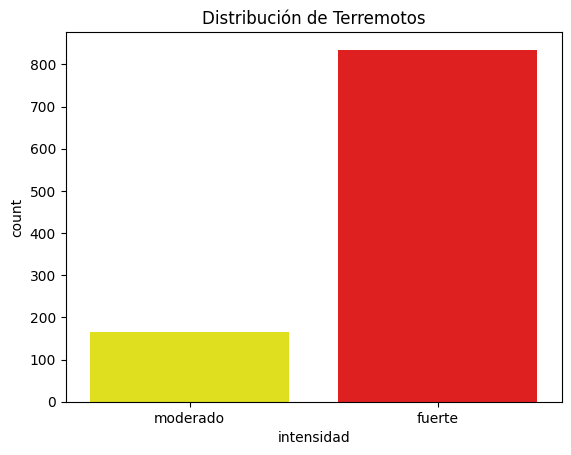

In [7]:
# Contar los valores únicos
print(df['intensidad'].value_counts())

# Visualizar la distribución
sns.countplot(x='intensidad', hue='intensidad', data=df,palette=['yellow', 'red'])
plt.title('Distribución de Terremotos')
plt.show()

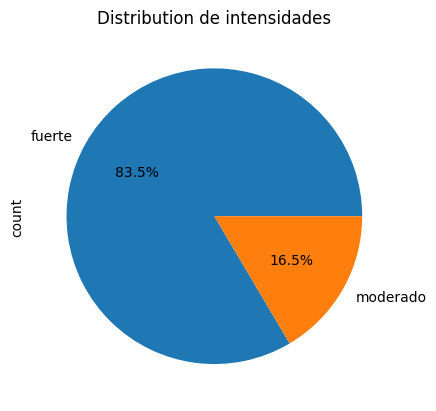

In [8]:
svm_palette = ['#3d5a80', '#98c1d9', '#ee6c4d', '#293241']
plt.title("Distribution de intensidades")
df['intensidad'].value_counts().plot.pie(autopct="%1.1f%%");

*Se nota un desbalance en las 2 clases de la distribucion de datos, donde la clase "Fuerte tiene mas del 50% de datos que la clase Moderado"*

### __¿Cómo afecta el desbalance a la regresión logística?<br>__
__Sesgo en las predicciones:__ El modelo puede predecir casi todos los ejemplos como pertenecientes a la clase mayoritaria,<br> lo que resulta en una baja precisión para la clase minoritaria.<br>
__Baja sensibilidad:__ La sensibilidad (recall) del modelo para la clase minoritaria será baja, lo que significa que el <br>modelo no podrá identificar correctamente muchos de los casos positivos de esta clase.<br>
__Sobreajuste:__ El modelo puede sobreajustarse a la clase mayoritaria, lo que dificulta su generalización a nuevos datos.

*OBSERVAMOS CON .SHAPE LA ESTRUCTURA DE NUESTRO DATA FRAME 1000 FILAS Y 21 COLUMNAS*

In [9]:
df.shape

(1000, 21)

### <CENTER>__DISTRIBUCION DE LOS DATOS__</CENTER>

*Magnitud minima del dataframe 6.5 y maxima 9.1, cabe destacar que en el proyecto no podemos visualizar la clase __leve__ ya que nuestro dataset <br> no contiene  aun valores menores a 3.5 de magnitud, mas adelante realizaremos el proceso para anexar valores en ese rango y comprobar resultados*

In [10]:
df.describe().round(1)

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,terremoto
count,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0,1000.0
mean,6.9,3.6,6.0,0.3,847.9,193.9,1.1,20.9,74.6,4.3,51.5,1.0
std,0.4,3.3,1.4,0.5,301.8,239.0,2.1,24.4,130.8,26.6,117.5,0.0
min,6.5,0.0,1.0,0.0,650.0,0.0,0.0,0.0,2.7,-61.8,-180.0,1.0
25%,6.6,0.0,5.0,0.0,691.0,0.0,0.0,0.0,16.0,-13.5,-71.7,1.0
50%,6.8,4.0,6.0,0.0,744.0,0.0,0.0,18.0,29.0,-2.4,107.8,1.0
75%,7.1,7.0,7.0,1.0,874.2,403.0,1.5,27.0,55.0,25.2,148.4,1.0
max,9.1,9.0,10.0,1.0,2910.0,934.0,17.7,239.0,670.8,71.6,179.7,1.0


*Comprobamos el porcentaje de valores nulos en cada celda del dataframe*

In [11]:
df.isnull().sum()/df.shape[0]*100

title          0.0
magnitude      0.0
date_time      0.0
cdi            0.0
mmi            0.0
alert         55.1
tsunami        0.0
sig            0.0
net            0.0
nst            0.0
dmin           0.0
gap            0.0
magType        0.0
depth          0.0
latitude       0.0
longitude      0.0
location       0.6
continent     71.6
country       34.9
terremoto      0.0
intensidad     0.0
dtype: float64

### __Limpiamos columnas irrelevantes para la clasificación__

In [12]:
df.columns

Index(['title', 'magnitude', 'date_time', 'cdi', 'mmi', 'alert', 'tsunami',
       'sig', 'net', 'nst', 'dmin', 'gap', 'magType', 'depth', 'latitude',
       'longitude', 'location', 'continent', 'country', 'terremoto',
       'intensidad'],
      dtype='object')

*Eliminamos columnas como title, continent, alert, location,magType,net ya que son tipo objeto y se desea trabajar con columnas numericas <br> y asi evitar errores*

*Decido quitar tambien la columna Country, ya que la calidad del data set respecto a este dato contiene la un 50% de valores Nulos*

In [13]:
df.drop(['title', 'continent', 'alert','location','country','magType','net'],axis=1,inplace=True)
df.head()

,magnitude,date_time,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,terremoto,intensidad
0,6.5,16-08-2023 12:47,7,4,0,657,114,7.2,25.0,193.0,-13.9,167.2,1,moderado
1,6.5,19-07-2023 00:22,8,6,0,775,92,0.7,40.0,69.7,12.8,-88.1,1,moderado
2,6.6,17-07-2023 03:05,7,5,0,899,70,1.6,28.0,171.4,-38.2,-70.4,1,fuerte
3,7.2,16-07-2023 06:48,6,6,1,860,173,0.9,36.0,32.6,54.4,-160.7,1,fuerte
4,7.3,16-07-2023 06:48,0,5,1,820,79,0.9,172.8,21.0,54.5,-160.8,1,fuerte


*Conversion de de la columna date_time que es tipo objeto en un formato fecha y hora, permitiendonos extraer <br> componentes especificos como año, mes, dia, etc*

In [14]:
df['date_time']=pd.to_datetime(df['date_time'], dayfirst=True)
df['Year']=pd.DatetimeIndex(df["date_time"]).year
df['Month']=pd.DatetimeIndex(df["date_time"]).month
df.drop('date_time',axis=1,inplace=True)
df.head()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,terremoto,intensidad,Year,Month
0,6.5,7,4,0,657,114,7.2,25.0,193.0,-13.9,167.2,1,moderado,2023,8
1,6.5,8,6,0,775,92,0.7,40.0,69.7,12.8,-88.1,1,moderado,2023,7
2,6.6,7,5,0,899,70,1.6,28.0,171.4,-38.2,-70.4,1,fuerte,2023,7
3,7.2,6,6,1,860,173,0.9,36.0,32.6,54.4,-160.7,1,fuerte,2023,7
4,7.3,0,5,1,820,79,0.9,172.8,21.0,54.5,-160.8,1,fuerte,2023,7


*Observamos que nuestro dataframe con el proceso que le estamos realizando de limpieza, ya no contiene valores nulos*

In [15]:
df.isnull().sum()

magnitude     0
cdi           0
mmi           0
tsunami       0
sig           0
nst           0
dmin          0
gap           0
depth         0
latitude      0
longitude     0
terremoto     0
intensidad    0
Year          0
Month         0
dtype: int64

### __<center>Distribucion Cantidad de terremotos ocurridos en diferentes Magnitudes</center>__

<Axes: xlabel='magnitude', ylabel='count'>

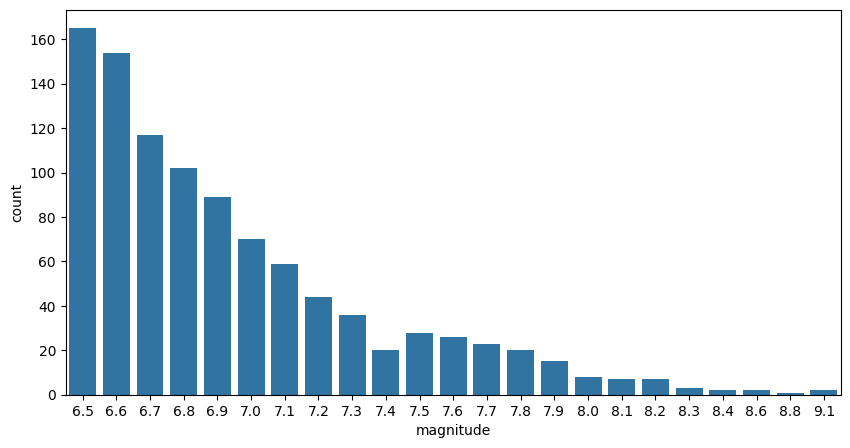

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x='magnitude',data=df)


Text(0.5, 1.0, 'TOP 15 terremotos x año')

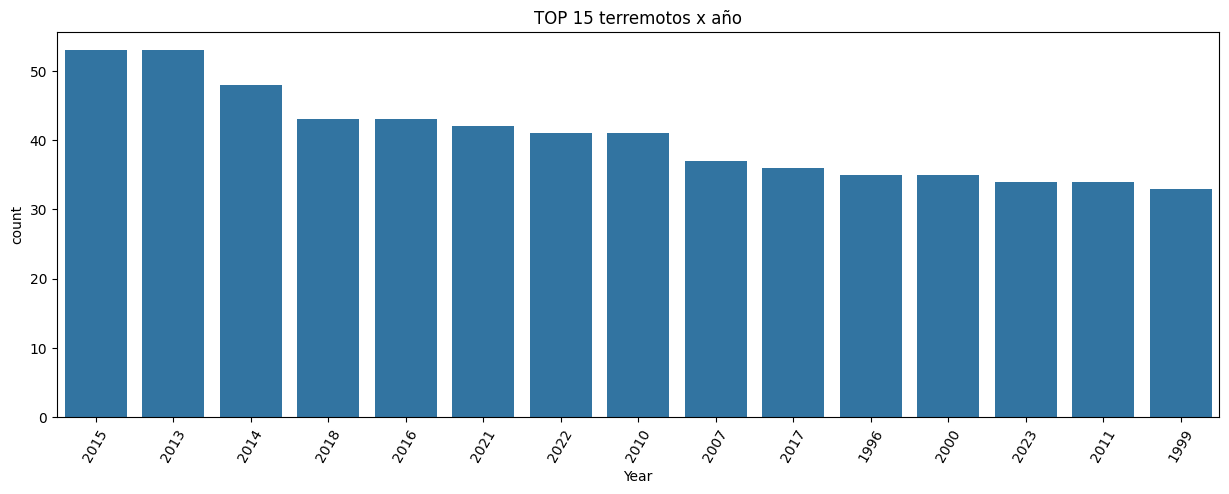

In [17]:
o=df['Year'].value_counts().head(15).index
plt.figure(figsize=(15,5))
sns.countplot(x='Year',data=df,order=o)
plt.xticks(rotation=60)
plt.title('TOP 15 terremotos x año')
#Indonesia has the highest number of earthquakes.

-__sig:__ Es un número que describe la importancia del evento. Los números <br>más grandes indican un evento más significativo. Este valor se determina en función <br>de una serie de factores, que incluyen: magnitud, MMI máximo "La intensidad instrumental máxima estimada para el evento.", informes sentidos e impacto estimado.<br> Por lo tanto observamos en la grafica como los valores en naranja referentes a Sig son asignados a las magnitudes mas fuertes, concluyendo que entre mas alto el sig mas fuerte es el evento sismico.

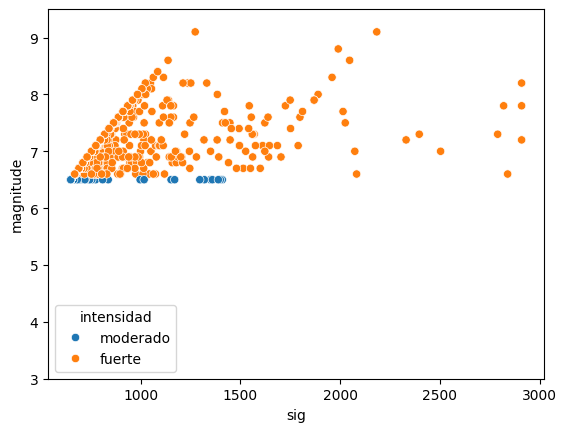

In [18]:
sns.scatterplot(x='sig',y='magnitude',data=df,hue='intensidad')
plt.ylim(3, 9.5)  # Ajusta los límites según tus necesidades
plt.show()

## <center>codificación de etiquetas</center> <br>
*convertimos datos categóricos en datos numéricos. Este suele ser un paso necesario en el aprendizaje automático, ya que la mayoría de los algoritmos funcionan con datos numéricos, por lo tanto en la columna intensidad quedaria el dato categorico moderado=1 y Fuerte=0*

*Visualizacion de Columnas tipo object para ser transformadas para su uso posterior, ya que se necesita usar intensidad como variable objetivo y el algoritmo no detecta en el tipo object, solamente numerico*

In [19]:
obj=df.select_dtypes(include=['object'])
obj.head()

,intensidad
0,moderado
1,moderado
2,fuerte
3,fuerte
4,fuerte


## __A DESTACAR__

*En la siguiente celda realizo la transformacion de los datos categoricos con labelencoder, y sucedio que genera otra columna adicional llamada tambien intensidad colocando el 1 a moderado y el 0 a fuerte, generando un error a la hora de realizar regresion logistica, esto se debe a que el dataframe continuo tambien detectando la columna intensidad con las variables categoricas fuerte y moderado tomando como tipo string, la solucion fue crear una funcion sencilla con un If para mapear unicamente los valores de cada celda y convertirlos de acuerdo a nuestra condicion*

In [20]:
'''obj=df.select_dtypes(include=['object'])
obj.head()
obj=obj.apply(LabelEncoder().fit_transform)
df=pd.concat([df,obj],axis=1)
df.head()'''
#SOLUCION
def mapear_intensidad(valor):
    if valor == 'moderado':
        return 1
    elif valor == 'fuerte':
        return 0
  
df['intensidad'] = df['intensidad'].apply(mapear_intensidad)
df.head(5)

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,terremoto,intensidad,Year,Month
0,6.5,7,4,0,657,114,7.2,25.0,193.0,-13.9,167.2,1,1,2023,8
1,6.5,8,6,0,775,92,0.7,40.0,69.7,12.8,-88.1,1,1,2023,7
2,6.6,7,5,0,899,70,1.6,28.0,171.4,-38.2,-70.4,1,0,2023,7
3,7.2,6,6,1,860,173,0.9,36.0,32.6,54.4,-160.7,1,0,2023,7
4,7.3,0,5,1,820,79,0.9,172.8,21.0,54.5,-160.8,1,0,2023,7


## <CENTER>__MATRIX DE CORRELACION__</CENTER>

<Axes: >

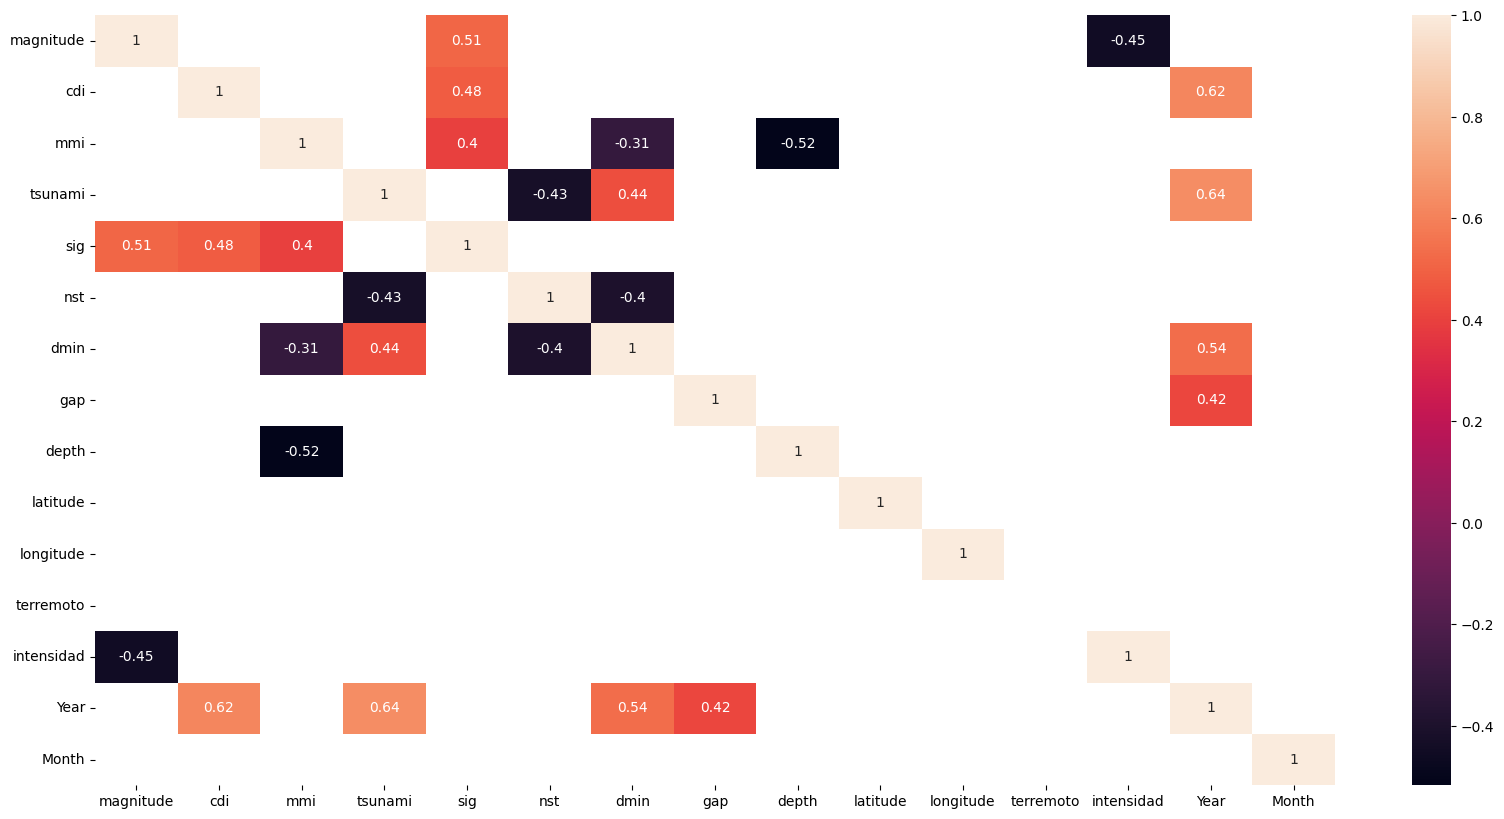

In [21]:
d=df.corr()
d=d[(d>0.3) | (d<-0.3)]
plt.figure(figsize=(20,10))
sns.heatmap(d,annot=True)

##### __<CENTER>SELECCION DE LA VARIABLE Y OBJETIVO Y LAS CARACTERISTICAS X INFLUYENTES</CENTER>__

In [22]:
X = df[['magnitude', 'cdi', 'mmi',  'sig', 'nst', 'dmin',  'Year', 'Month']]
y = df['intensidad']


##### __<CENTER>DIVISION EN CONJUNTO DE ENTRENAMIENTO Y PRUEBA</CENTER>__

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


#### __<CENTER>CREAMOS EL MODELO DE REGRESION LOGISTICA</CENTER>__

In [24]:
model = LogisticRegression() 

#### __<CENTER>ENTRENAMIENTO DEL MODELO</CENTER>__

In [25]:

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### __<CENTER>METRICAS DE CLASIFICACION</CENTER>__

Estas metricas nos proporcionan una evaluacion detallada del desempeño del modelo de clasificacion.

In [26]:
accuracy = accuracy_score(y_test,
 y_pred)
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93       259
           1       0.55      0.41      0.47        41

    accuracy                           0.87       300
   macro avg       0.73      0.68      0.70       300
weighted avg       0.86      0.87      0.87       300



In [27]:
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()

df.style.background_gradient(cmap='Greens').format("{:.3f}")

,precision,recall,f1-score,support
0,0.911,0.946,0.928,259.000
1,0.548,0.415,0.472,41.000
accuracy,0.873,0.873,0.873,0.873
macro avg,0.730,0.680,0.700,300.000
weighted avg,0.861,0.873,0.866,300.000


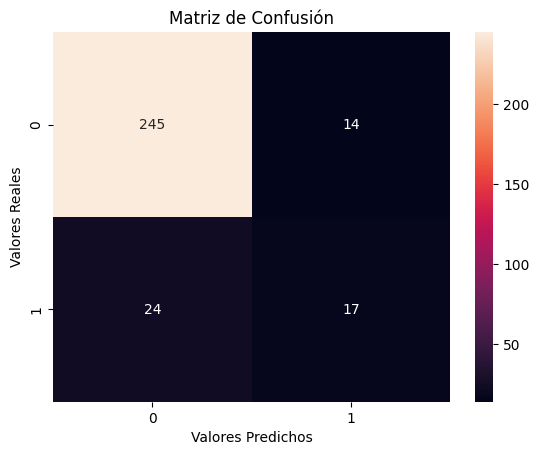

In [28]:
confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Matriz de Confusión')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.show()

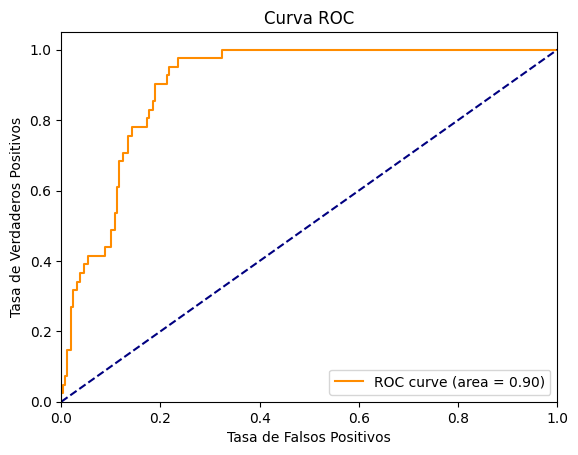

Text(0.5, 1.0, 'Histograma de errores')

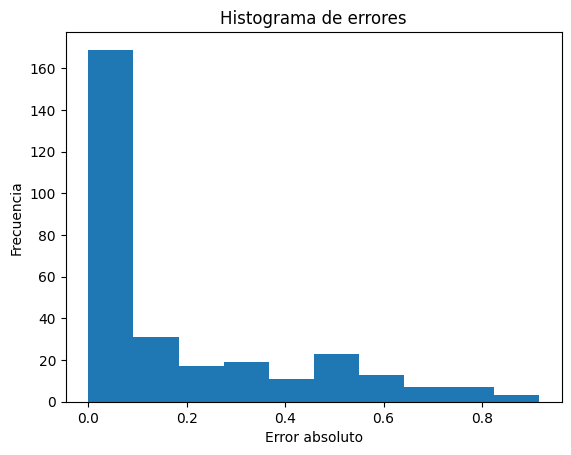

In [29]:
y_pred = model.predict_proba(X_test)[:, 1]

# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")

plt.show()

# Histograma de errores
errors = np.abs(y_test - y_pred)
plt.hist(errors, bins=10)
plt.xlabel('Error absoluto')
plt.ylabel('Frecuencia')
plt.title('Histograma de errores')

### __<center>CONCLUSIONES</center>__
__Desempeño General Bueno:__ El modelo tiene una precisión general del 87%, lo cual indica que en la mayoría de los casos está clasificando correctamente las instancias.<br>
__Desequilibrio en las Clases:__ La clase 0 está sobre-representada (259 instancias) en comparación con la clase 1 (41 instancias). Esto puede influir en el desempeño del modelo, especialmente en la clase minoritaria.<br>
__Clase 0 Bien Clasificada:__ La clase 0 tiene una precisión, recall y F1-score altos, lo que sugiere que el modelo es muy bueno en identificar correctamente las instancias de esta clase.<br>
__Desempeño Débil en la Clase 1:__ La clase 1 muestra valores más bajos en precisión, recall y F1-score. Esto indica que el modelo tiene dificultades para identificar correctamente las instancias de esta clase minoritaria.

### __<center>AJUSTE DEL MODELO</center>__

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,terremoto,intensidad,Year,Month
0,6.5,7,4,0,657,114,7.2,25.0,193.0,-13.9,167.2,1,1,2023,8
1,6.5,8,6,0,775,92,0.7,40.0,69.7,12.8,-88.1,1,1,2023,7
2,6.6,7,5,0,899,70,1.6,28.0,171.4,-38.2,-70.4,1,0,2023,7


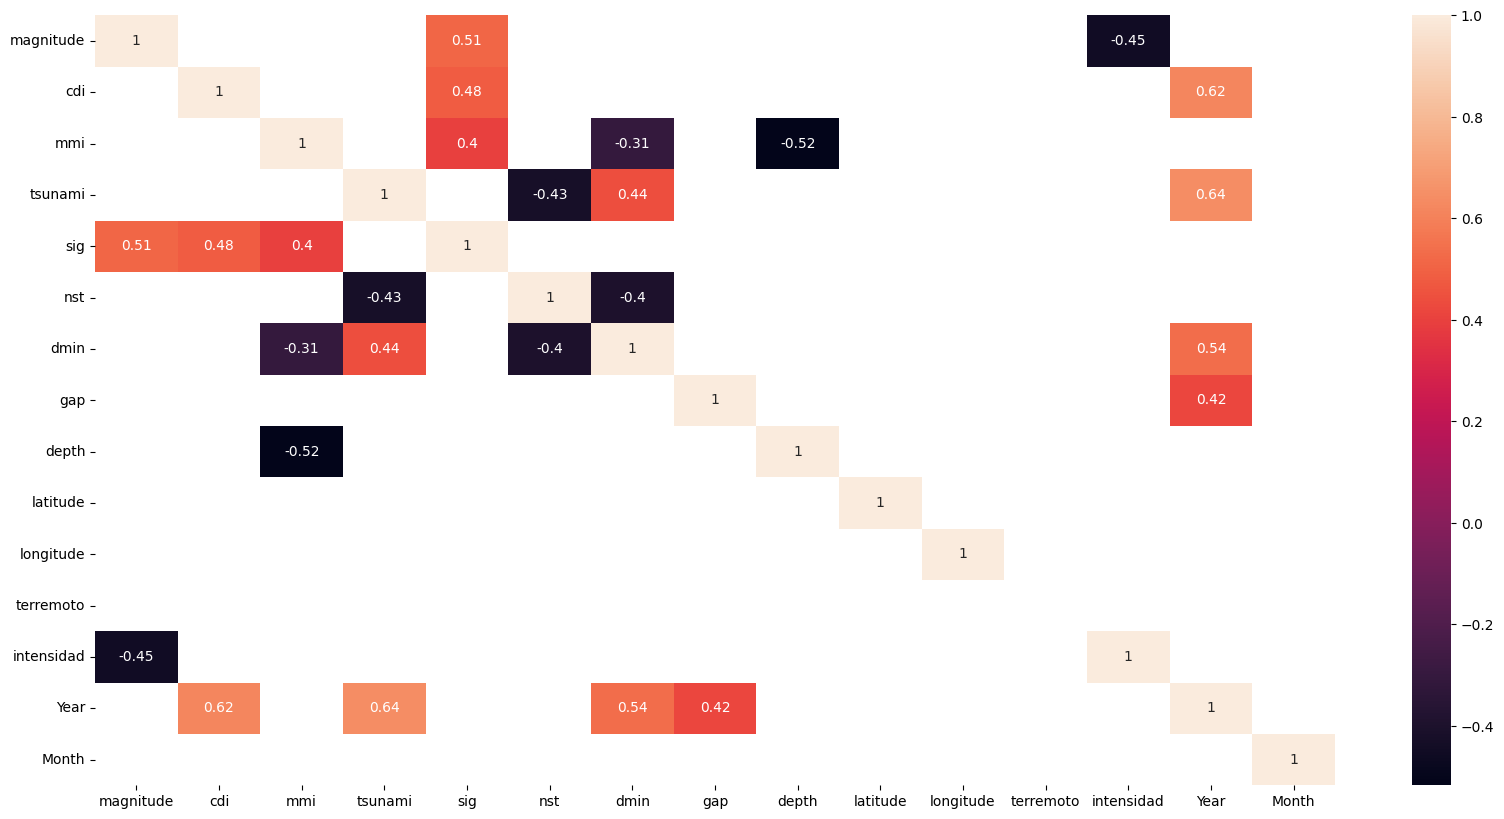

In [30]:
df_sredondeo =pd.read_csv("earthquake_1995-2023.csv")
df = df_sredondeo.round(1)
#en la escala de Richter, un terremoto se considera significativo a partir de una magnitud de 3.5.
df['terremoto'] = np.where(df['magnitude'] >= 3.5, 1, 0)
# Crear la columna 'intensidad' con las categorías especificadas
df['intensidad'] = np.where(df['magnitude'] <= 3.5, 'leve',
                           np.where(df['magnitude'] <= 6.5, 'moderado', 'fuerte'))


df['date_time']=pd.to_datetime(df['date_time'],dayfirst=True)
df['Year']=pd.DatetimeIndex(df["date_time"]).year
df['Month']=pd.DatetimeIndex(df["date_time"]).month
df.drop('date_time',axis=1,inplace=True)    

def mapear_intensidad(valor):
    if valor == 'moderado':
        return 1
    elif valor == 'fuerte':
        return 0
  
df['intensidad'] = df['intensidad'].apply(mapear_intensidad)
df.drop(['title', 'continent', 'alert','location','country','magType','net'],axis=1,inplace=True)
d=df.corr()
d=d[(d>0.3) | (d<-0.3)]
plt.figure(figsize=(20,10))
sns.heatmap(d,annot=True)
df.head(3)

In [31]:
X = df[['magnitude', 'sig']]
y = df['intensidad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression() 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.style.background_gradient(cmap='Reds').format("{:.3f}")

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       259
           1       1.00      0.90      0.95        41

    accuracy                           0.99       300
   macro avg       0.99      0.95      0.97       300
weighted avg       0.99      0.99      0.99       300



,precision,recall,f1-score,support
0,0.985,1.000,0.992,259.000
1,1.000,0.902,0.949,41.000
accuracy,0.987,0.987,0.987,0.987
macro avg,0.992,0.951,0.971,300.000
weighted avg,0.987,0.987,0.986,300.000


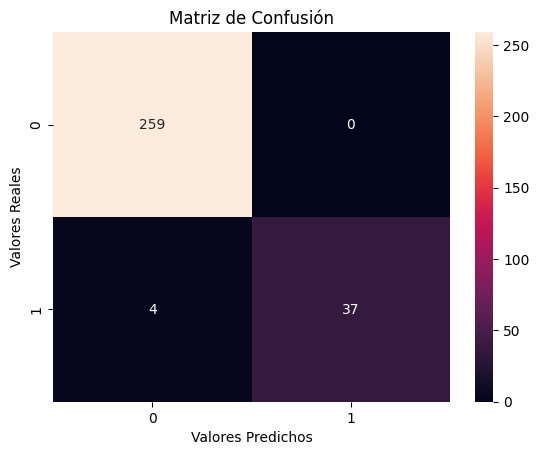

In [32]:
confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Matriz de Confusión')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.show()

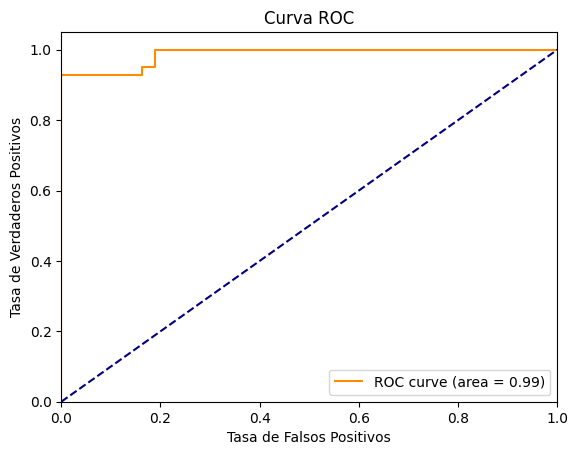

Text(0.5, 1.0, 'Histograma de errores')

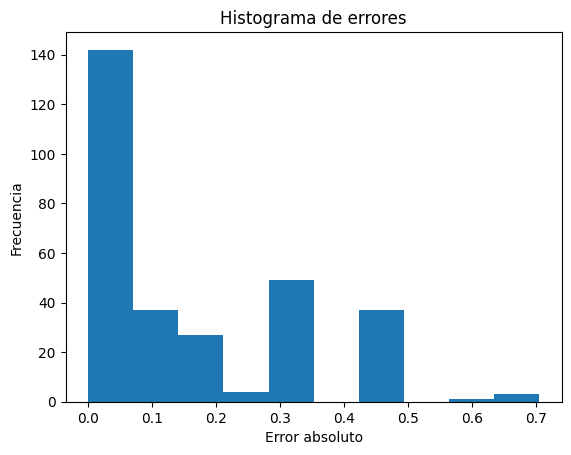

In [33]:
y_pred = model.predict_proba(X_test)[:, 1]
# Curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
# Histograma de errores
errors = np.abs(y_test - y_pred)
plt.hist(errors, bins=10)
plt.xlabel('Error absoluto')
plt.ylabel('Frecuencia')
plt.title('Histograma de errores')

### __<center>CONCLUSIONES</center>__

__El modelo es altamente preciso en la clasificación de la clase 0:__ Con una precisión de 0.98, el modelo es muy bueno en identificar correctamente los casos que pertenecen a la clase 0. Esto significa que cuando el modelo predice que una muestra pertenece a la clase 0, casi siempre acierta.<br>
__El modelo tiene un buen desempeño general:__ El F1-score promedio es de 0.97, lo que indica que el modelo logra un buen equilibrio entre precisión y recall en ambas clases. Esto significa que el modelo es capaz de identificar correctamente tanto los casos positivos como los negativos.<br>
__La clase 1 presenta un menor recall:__ Aunque la precisión de la clase 1 es alta, el recall es un poco más bajo. Esto sugiere que el modelo podría estar pasando por alto algunos casos positivos de la clase 1. Es decir, podría estar clasificando algunos casos de la clase 1 como si pertenecieran a la clase 0.<br>
__El modelo es muy confiable:__ La precisión general del modelo es de 0.99, lo que indica que es muy confiable en sus predicciones.<br>
__El desbalance de clases podría estar afectando los resultados:__ Si la clase 0 tiene muchas más muestras que la clase 1, el modelo podría estar sesgado hacia la clase mayoritaria. Esto podría explicar por qué la precisión de la clase 0 es más alta.

#### <CENTER> __INYECCION DE DATOS AL DATA SET ORIGINAL PARA VISUALIZAR LA CLASE DE MAGNITUD MENOR A 3.5 GRADOS__</CENTER>

In [34]:
df_sredondeo =pd.read_csv("earthquake_1995-2023.csv")
df = df_sredondeo.round(1)
#en la escala de Richter, un terremoto se considera significativo a partir de una magnitud de 3.5.
df['terremoto'] = np.where(df['magnitude'] >= 3.5, 1, 0)
# Crear la columna 'intensidad' con las categorías especificadas
df['intensidad'] = np.where(df['magnitude'] <= 3.5, 'leve',
                           np.where(df['magnitude'] <= 6.5, 'moderado', 'fuerte'))


df['date_time']=pd.to_datetime(df['date_time'],dayfirst=True)
df['Year']=pd.DatetimeIndex(df["date_time"]).year
df['Month']=pd.DatetimeIndex(df["date_time"]).month
df.drop('date_time',axis=1,inplace=True)    

new_data = pd.DataFrame({
    'magnitude': np.random.uniform(0, 5, 1000),  # Magnitud entre 2.0 y 6.0
    'cdi': np.random.randint(0, 10, 1000),
    'mmi': np.random.randint(0, 10, 1000),
    'tsunami': np.random.randint(0, 1, 1000),  # 0 o 1
    'sig': np.random.randint(0, 1500, 1000),
    'nst': np.random.randint(0, 300, 1000),
    'dmin': np.random.uniform(0, 10, 1000),  # Rango ajustado
    'gap': np.random.uniform(0, 360, 1000),  # Máximo 360 grados
    'depth': np.random.uniform(0, 700, 1000),  # Profundidad razonable
    'latitude': np.random.uniform(-90, 90, 1000),
    'longitude': np.random.uniform(-180, 180, 1000),
    'Year': np.random.randint(2000, 2024, 1000),  # Años recientes
    'Month': np.random.randint(1, 13, 1000),  # Meses del 1 al 12
    'magType': np.random.randint(0, 10, 1000)  # Rango 
    })
new_data['terremoto'] = np.where(new_data['magnitude'] >= 3.5, 1, 0)
# Crear la columna 'intensidad' con las categorías especificadas
new_data['intensidad'] = np.where(new_data['magnitude'] <= 3.5, 'leve',
                           np.where(new_data['magnitude'] <= 6.5, 'moderado', 'fuerte'))
df = pd.concat([df, new_data], ignore_index=True)
df.drop(['title', 'continent', 'alert','location','country','magType','net'],axis=1,inplace=True)
df.sample(n=15)


,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,terremoto,intensidad,Year,Month
1751,4.171666,2,0,0,1040,103,4.004939,91.478150,183.060883,-29.188549,-152.662817,1,moderado,2012,9
389,6.500000,7,7,0,670,0,0.800000,82.000000,24.100000,-20.300000,-70.600000,1,moderado,2014,4
1455,0.122422,9,9,0,1401,80,3.528893,49.935145,123.096498,43.189215,136.363877,0,leve,2006,4
803,6.700000,0,6,0,691,282,0.000000,0.000000,17.000000,-7.400000,155.900000,1,fuerte,2001,4
629,6.800000,5,6,0,747,653,0.000000,17.600000,15.000000,3.000000,-78.000000,1,fuerte,2007,9
391,8.200000,9,8,1,1332,0,0.600000,23.000000,25.000000,-19.600000,-70.800000,1,fuerte,2014,4
777,7.100000,0,7,0,776,257,0.000000,0.000000,85.700000,13.100000,144.600000,1,fuerte,2002,4
490,6.900000,8,8,0,1562,383,0.000000,13.000000,50.000000,27.700000,88.200000,1,fuerte,2011,9
1920,3.081367,2,7,0,325,118,6.467522,152.586870,221.377177,-35.024293,-176.680644,0,leve,2013,7
56,6.600000,6,5,1,762,0,0.900000,94.000000,27.000000,11.600000,-87.000000,1,fuerte,2022,4


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   magnitude   2000 non-null   float64
 1   cdi         2000 non-null   int64  
 2   mmi         2000 non-null   int64  
 3   tsunami     2000 non-null   int64  
 4   sig         2000 non-null   int64  
 5   nst         2000 non-null   int64  
 6   dmin        2000 non-null   float64
 7   gap         2000 non-null   float64
 8   depth       2000 non-null   float64
 9   latitude    2000 non-null   float64
 10  longitude   2000 non-null   float64
 11  terremoto   2000 non-null   int64  
 12  intensidad  2000 non-null   object 
 13  Year        2000 non-null   int32  
 14  Month       2000 non-null   int32  
dtypes: float64(6), int32(2), int64(6), object(1)
memory usage: 218.9+ KB


intensidad
fuerte      835
leve        723
moderado    442
Name: count, dtype: int64


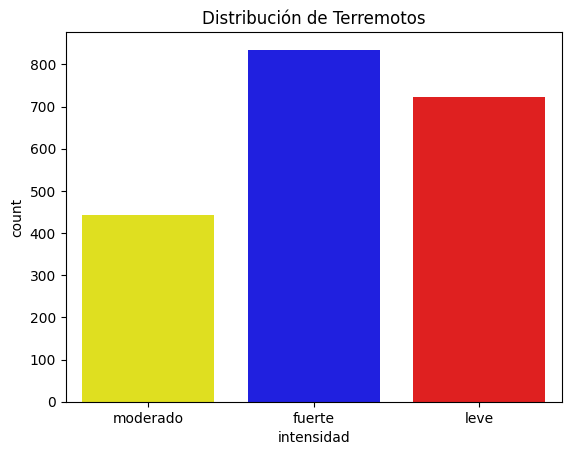

In [36]:
# Contar los valores únicos
print(df['intensidad'].value_counts())

# Visualizar la distribución
sns.countplot(x='intensidad', hue='intensidad', data=df,palette=['yellow', 'blue', 'red'])
plt.title('Distribución de Terremotos')
plt.show()

In [37]:
df.describe()

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,terremoto,Year,Month
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.679487,4.126000,5.245500,0.162500,799.64450,171.387000,3.060108,100.462775,215.024196,2.918512,24.019980,0.638500,2010.744000,6.615000
std,2.498394,3.121377,2.405644,0.369001,374.61437,180.513597,3.183304,110.618544,221.685447,40.877619,114.554963,0.480555,7.660405,3.487098
min,0.000094,0.000000,0.000000,0.000000,7.00000,0.000000,0.000000,0.000000,0.618756,-89.968507,-180.000000,0.000000,1995.000000,1.000000
25%,2.347394,1.000000,4.000000,0.000000,650.00000,0.000000,0.000000,16.219754,26.825000,-21.750000,-76.950000,0.000000,2004.000000,4.000000
50%,5.749164,4.000000,6.000000,0.000000,747.00000,129.000000,2.000000,38.043863,112.423888,-1.641473,46.626218,1.000000,2011.000000,7.000000
75%,6.800000,7.000000,7.000000,0.000000,985.00000,259.000000,5.466974,178.338353,393.567473,34.950000,131.274531,1.000000,2017.000000,10.000000
max,9.100000,9.000000,10.000000,1.000000,2910.00000,934.000000,17.700000,359.745794,699.757736,89.858736,179.800567,1.000000,2023.000000,12.000000


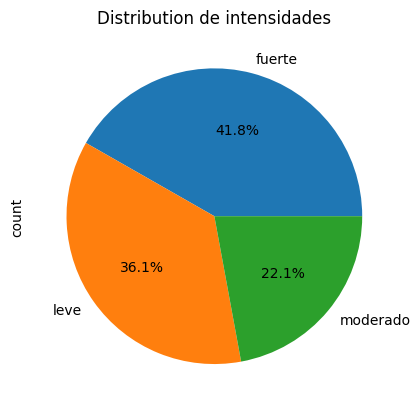

In [38]:
svm_palette = ['#3d5a80', '#98c1d9', '#ee6c4d', '#293241']
plt.title("Distribution de intensidades")
df['intensidad'].value_counts().plot.pie(autopct="%1.1f%%");

In [39]:
df.isnull().sum()/df.shape[0]*100

magnitude     0.0
cdi           0.0
mmi           0.0
tsunami       0.0
sig           0.0
nst           0.0
dmin          0.0
gap           0.0
depth         0.0
latitude      0.0
longitude     0.0
terremoto     0.0
intensidad    0.0
Year          0.0
Month         0.0
dtype: float64

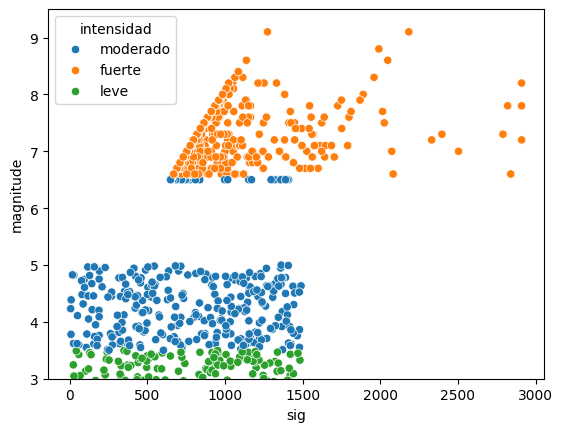

In [40]:
sns.scatterplot(x='sig',y='magnitude',data=df,hue='intensidad')
plt.ylim(3, 9.5)  # Ajusta los límites según tus necesidades
plt.show()

In [41]:
obj=df.select_dtypes(include=['object'])
obj.sample(n=10)

,intensidad
1530,leve
662,fuerte
773,moderado
1685,leve
410,moderado
878,fuerte
328,fuerte
300,fuerte
1953,moderado
989,fuerte


In [42]:


def mapear_intensidad(valor):
    if valor == 'leve':
        return 2
    elif valor == 'moderado':
        return 1
    elif valor == 'fuerte':
        return 0
  
df['intensidad'] = df['intensidad'].apply(mapear_intensidad)
df.sample(10)

,magnitude,cdi,mmi,tsunami,sig,nst,dmin,gap,depth,latitude,longitude,terremoto,intensidad,Year,Month
1047,4.537264,1,2,0,354,102,6.610575,152.502143,300.623466,-84.793010,-39.406998,1,1,2023,5
601,6.900000,4,5,0,740,544,0.000000,25.900000,24.000000,13.400000,125.600000,1,0,2008,3
161,7.300000,4,6,1,952,0,2.600000,16.000000,212.000000,-6.400000,129.200000,1,0,2019,6
151,6.500000,7,7,1,656,0,3.900000,15.000000,12.300000,-3.500000,128.400000,1,1,2019,9
1399,1.662165,7,9,0,1456,79,2.075008,12.435870,9.370666,77.027074,136.763554,0,2,2012,6
20,6.500000,7,5,0,1350,134,2.500000,13.000000,187.600000,36.500000,71.000000,1,1,2023,3
1855,3.310032,2,3,0,1034,201,4.228560,275.584222,290.149324,-75.357614,24.070257,0,2,2003,1
1604,4.075499,0,3,0,907,52,6.088078,326.028967,299.432151,82.903323,-41.236690,1,1,2020,11
1904,1.311331,8,0,0,1261,87,8.445510,39.604911,69.065651,52.884332,-18.316083,0,2,2001,12
940,6.700000,0,7,0,691,0,0.000000,0.000000,22.000000,31.900000,131.500000,1,0,1996,10


In [43]:
X = df[['magnitude', 'sig']]
y = df['intensidad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Informe de Clasificación:\n", classification_report(y_test, y_pred))
report = classification_report(y_test, y_pred, output_dict=True)
df = pd.DataFrame(report).transpose()
df.style.background_gradient(cmap='Reds').format("{:.1f}")

Informe de Clasificación:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       254
           1       1.00      0.92      0.96       130
           2       0.99      1.00      0.99       216

    accuracy                           0.98       600
   macro avg       0.99      0.97      0.98       600
weighted avg       0.98      0.98      0.98       600



,precision,recall,f1-score,support
0,1.0,1.0,1.0,254.0
1,1.0,0.9,1.0,130.0
2,1.0,1.0,1.0,216.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,600.0
weighted avg,1.0,1.0,1.0,600.0


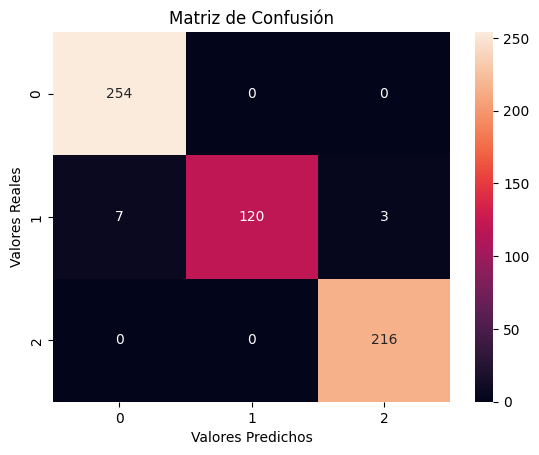

In [44]:
confusion_matrix(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Matriz de Confusión')
plt.ylabel('Valores Reales')
plt.xlabel('Valores Predichos')
plt.show()

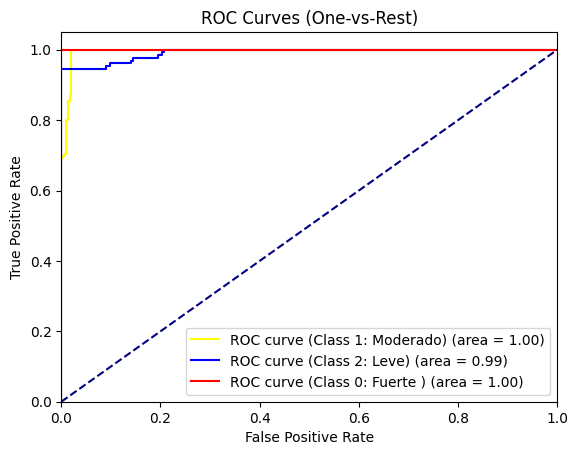

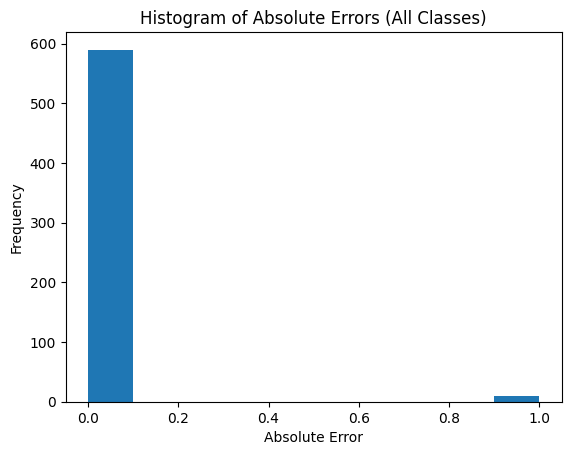

In [45]:
y_pred_proba = model.predict_proba(X_test)  
colors = ['yellow', 'blue', 'red']  

fpr_list, tpr_list, auc_list = [], [], []
class_names = ["Class 1: Moderado", "Class 2: Leve", "Class 0: Fuerte "]  

for i in range(y_pred_proba.shape[1]):  # Loop through each class
    y_test_binary = y_test == i  # Convert labels to binary for each class
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba[:, i])
    roc_auc = roc_auc_score(y_test_binary, y_pred_proba[:, i])

    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(roc_auc)

    plt.plot(fpr, tpr, color=colors[i], label=f'ROC curve ({class_names[i]}) (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves (One-vs-Rest)')
plt.legend(loc="lower right")
plt.show()

# Error histogram (consider using a separate histogram for each class)
errors = np.abs(y_test - np.argmax(y_pred_proba, axis=1))  # Absolute error based on predicted class
plt.hist(errors, bins=10)
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.title('Histogram of Absolute Errors (All Classes)')
plt.show()

In [ ]:
joblib.dump(model, 'modelo_terremotos.pkl')

['modelo_terremotos.pkl']

## <CENTER> __BIBLIOGRAFIA__ </CENTER>

*https://gemini.google.com/app*

https://www.kaggle.com/datasets/warcoder/earthquake-dataset

https://imaster.academy/course/view.php?id=2667&section=3

https://imaster.academy/course/view.php?id=2667&section=1

https://imaster.academy/course/view.php?id=2667&section=9